In [1]:
#!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print("Path to dataset files:", path)
books = pd.read_csv(f"{path}/Books.csv")
ratings = pd.read_csv(f"{path}/Ratings.csv")
users= pd.read_csv(f"{path}/Users.csv")

book_of_interest = 'the lord of the rings'

/tmp/ipykernel_3975/1594531792.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(f"{path}/Books.csv")


Find LOTR books in the database

In [4]:
books['Book-Title'] = books['Book-Title'].str.lower()
lotr_books = books[books["Book-Title"].str.contains(book_of_interest)]
lotr_books.head(20)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
780,0345339711,"the two towers (the lord of the rings, part 2)",J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...
1571,0345339703,the fellowship of the ring (the lord of the ri...,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
3354,0345339681,the hobbit : the enchanting prelude to the lor...,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...
4206,0345339738,"the return of the king (the lord of the rings,...",J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339738.0...,http://images.amazon.com/images/P/0345339738.0...,http://images.amazon.com/images/P/0345339738.0...
6060,0618129022,the lord of the rings (movie art cover),J.R.R. Tolkien,2001,Houghton Mifflin Company,http://images.amazon.com/images/P/0618129022.0...,http://images.amazon.com/images/P/0618129022.0...,http://images.amazon.com/images/P/0618129022.0...
6866,0345340426,the hobbit and the lord of the rings,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345340426.0...,http://images.amazon.com/images/P/0345340426.0...,http://images.amazon.com/images/P/0345340426.0...
11083,0618129014,the lord of the rings (movie art cover),J. R. R. Tolkien,2001,Houghton Mifflin Company,http://images.amazon.com/images/P/0618129014.0...,http://images.amazon.com/images/P/0618129014.0...,http://images.amazon.com/images/P/0618129014.0...
12761,0618002243,"the return of the king (the lord of the rings,...",J. R. R. Tolkien,1999,Houghton Mifflin Company,http://images.amazon.com/images/P/0618002243.0...,http://images.amazon.com/images/P/0618002243.0...,http://images.amazon.com/images/P/0618002243.0...
12762,0618002235,"the two towers (the lord of the rings, part 2)",J. R. R. Tolkien,1999,Houghton Mifflin Company,http://images.amazon.com/images/P/0618002235.0...,http://images.amazon.com/images/P/0618002235.0...,http://images.amazon.com/images/P/0618002235.0...
12763,0618002227,the fellowship of the ring (the lord of the ri...,J. R. R. Tolkien,1999,Houghton Mifflin Company,http://images.amazon.com/images/P/0618002227.0...,http://images.amazon.com/images/P/0618002227.0...,http://images.amazon.com/images/P/0618002227.0...


Books

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,classical mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,clara callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,decision in normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,flu: the story of the great influenza pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,the mummies of urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Get rid of images and nan values

In [6]:
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
print(books.isna().any(axis=1).sum()) # there only 4 incomplete rows, I'll simply drop them
books.dropna(inplace=True)

4


I might deduplicate on (author + title) pairs later on, as there may be ratings for same books with different ISBNs that I would otherwise get rid off

In [7]:
num_duplicates = books.duplicated(subset=['Book-Title', 'Book-Author']).sum()

print(f"Duplicate books ({round(num_duplicates*100/len(books), 2)} %)")

Duplicate books (8.17 %)


In [8]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
books = books.fillna({'Year-Of-Publication': 1993}) # 1993 is the mean
books['Year-Of-Publication'][books['Year-Of-Publication'] > 0].describe()

count    266735.000000
mean       1993.689688
std           8.325839
min        1376.000000
25%        1989.000000
50%        1996.000000
75%        2000.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64

Text(0.5, 1.0, 'Top Authors')

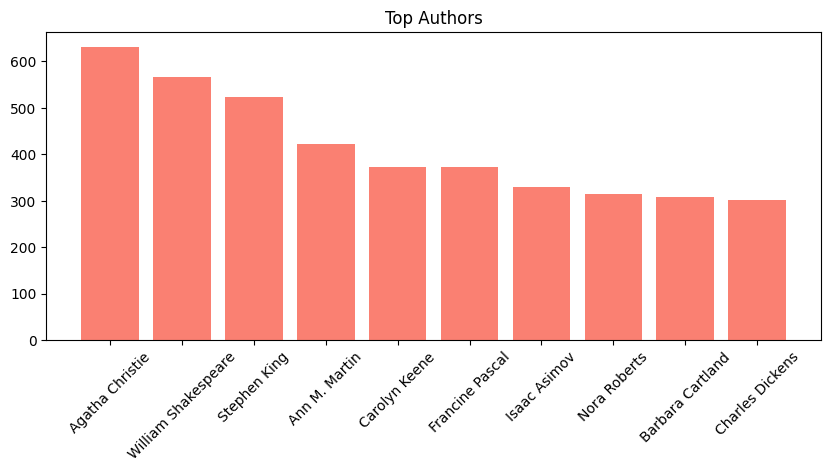

In [9]:
author_count = books['Book-Author'].value_counts().reset_index(name='Count').sort_values('Count', ascending=False).head(10)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.bar(author_count['Book-Author'], author_count['Count'], color='salmon')
ax.set_xticks(range(len(author_count)))
ax.set_xticklabels(author_count['Book-Author'], rotation=45)
ax.set_title('Top Authors')

Users

In [10]:
users['Location'] = users['Location'].apply(lambda x: x.split(',')[-1].lower())
users['Location'].unique()[:100]

array([' usa', ' russia', ' portugal', ' united kingdom', ' canada',
       ' spain', ' australia', ' brazil', '', ' germany', ' mexico',
       ' china', ' italy', ' distrito federal', ' france', ' netherlands',
       ' iraq', ' finland', ' new zealand', ' india', ' ghana',
       ' switzerland', ' slovenia', ' iran', ' peru',
       ' bosnia and herzegovina', ' vietnam', ' sri lanka', ' pakistan',
       ' denmark', ' belgium', ' malaysia', ' u.a.e', ' turkey',
       ' philippines', ' greece', ' colombia', ' norway', ' kuwait',
       ' chile', ' quit', ' lj', ' taiwan', ' denmark"', ' españa',
       ' sweden', ' argentina', ' nigeria', ' london', ' bulgaria',
       ' austria', ' romania', ' singapore', ' albania', ' egypt',
       ' tunisia', ' uzbekistan', ' qatar', ' syria', ' saudi arabia',
       ' indonesia', ' sudan', ' somewherein space', ' poland',
       ' thailand', ' ireland', ' malaysia"', ' venezuela', ' paraguay',
       ' mozambique', ' morocco', ' afghanistan', '

In [11]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
users['Age'].isna().sum() / len(users['Age'])

0.3971985741847105

In [13]:
users.fillna({'Age': 0}, inplace=True)

In [14]:
users.loc[users['Age'] <= 3, 'Age'] = 0
users[users['Age'] > 3].describe()

,User-ID,Age
count,167242.000000,167242.000000
mean,139394.795972,34.925103
std,80554.752563,14.258066
min,2.000000,4.000000
25%,69913.250000,24.000000
50%,139361.500000,32.000000
75%,209153.750000,44.000000
max,278855.000000,244.000000


In [15]:
mean = users['Age'][users['Age'] <= 3].mean()
users['Age'] = users['Age'].replace(0, mean)

Ratings

In [16]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


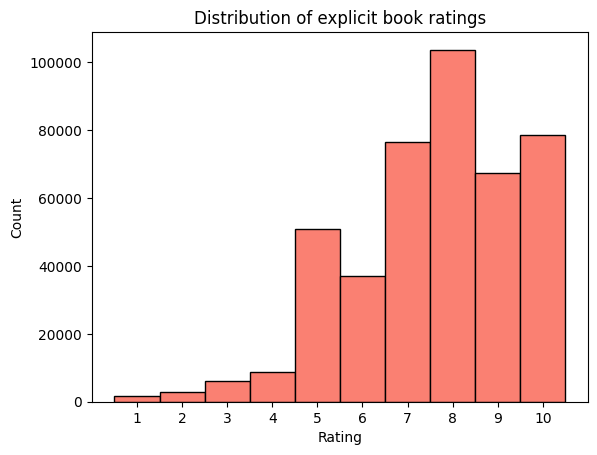

In [17]:
plt.hist(ratings['Book-Rating'], color='salmon', bins=range(1, 12), edgecolor='black', align='left')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of explicit book ratings')
plt.xticks(range(1, 11))
plt.show()

We have explicit and implicit feedback...

In [18]:
ratings_explicit = ratings[ratings['Book-Rating'] != 0] # choose only explicit ratings for now

book_ratings = pd.merge(books, ratings_explicit, on='ISBN')
implicit = 1 - len(book_ratings) / len(ratings)
print(f"Implicit ratings percentage: {implicit:.2%}")

Implicit ratings percentage: 66.62%


Get the user-book rating matrix

In [19]:
complete_df = book_ratings.merge(users, on="User-ID") # create a triplet dataframe of users;rankings;books dataframes
complete_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0002005018,clara callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,canada,0.0
1,0002005018,clara callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8,n/a,0.0
2,0002005018,clara callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8,canada,30.0
3,0002005018,clara callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866,9,,0.0
4,0002005018,clara callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629,9,canada,0.0


Calculate the sparsity of our user-book ratings

In [20]:
def compute_sparsity(ratings_df):
    n_users = ratings_df['User-ID'].nunique()
    n_books = ratings_df['ISBN'].nunique()
    print(f"Number of users: {n_users}")
    print(f"Number of books: {n_books}")

    total_possible = n_users * n_books
    actual_ratings = len(ratings_df)
    print(f"Actual ratings: {actual_ratings}")
    print(f"Total possible ratings: {total_possible}")

    sparsity = 1 - (actual_ratings / total_possible)
    print(f"Sparsity of the user-book ratings: {sparsity:.7f}")

    return sparsity

In [21]:
sparsity = compute_sparsity(complete_df)

Number of users: 68091
Number of books: 149832
Actual ratings: 383838
Total possible ratings: 10202210712
Sparsity of the user-book ratings: 0.9999624


Our data is very sparse. To try and mitgate this, we can filter out less popular books and inexperienced users

In [22]:
mask_users = complete_df.groupby('User-ID')['Book-Rating'] \
                        .transform('size') >= 15
mask_books = complete_df.groupby('ISBN')['Book-Rating'] \
                         .transform('size') >= 10

filtered_df = complete_df[mask_users & mask_books]

In [23]:
sparsity = compute_sparsity(filtered_df)

Number of users: 4345
Number of books: 5437
Actual ratings: 77255
Total possible ratings: 23623765
Sparsity of the user-book ratings: 0.9967298


I will train a classical SVD model and use the learned book vectors in latent space to do item to item similarity.

If a root mean square error is around 1.5 on average. We can safely say that the average rating prediction of our model is off by no more than 1.5, since rmse is greater or equal to the mean absolute error

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import KFold
from surprise import accuracy

data_df = filtered_df[['User-ID', 'ISBN', 'Book-Rating']].copy()

# create the model from surprise library and perform 5-fold cross-validation
min_c, max_c = data_df['Book-Rating'].min(), data_df['Book-Rating'].max()
reader = Reader(rating_scale=(min_c, max_c))
data = Dataset.load_from_df(data_df, reader)
model = SVD(n_factors=50)

rmse_test, rmse_train = [], []
kf = KFold(n_splits=5, random_state=42, shuffle=True)

for fold, (train, test) in enumerate(kf.split(data)):
    model.fit(train)

    preds = model.test(test)
    rmse_curr = accuracy.rmse(preds)
    rmse_test.append(rmse_curr)

    train_testset = train.build_testset()
    preds = model.test(train_testset)
    rmse_curr = accuracy.rmse(preds, verbose=False)
    rmse_train.append(rmse_curr)

print(f"Mean test set RMSE: {np.mean(rmse_test):.4f}")
print(f"Mean train set RMSE: {np.mean(rmse_train):.4f}")

In [70]:
import numpy as np

isbn2title = {
    isbn: title.strip().lower()
    for isbn, title in zip(books['ISBN'], books['Book-Title'])
}

inner2title = {}
for inner_id in range(train.n_items):
    try:
        raw_id = train.to_raw_iid(inner_id)
        inner2title[inner_id] = isbn2title.get(raw_id, "").lower()
    except ValueError:
        continue

title2inner = {
    title: iid
    for iid, title in inner2title.items()
    if title
}

def book2book_retrieval(book_title, model, title2inner, inner2title, top_n=10):
    key = book_title.lower()
    if key not in title2inner:
        # find a partial match
        for inner_id, title in inner2title.items():
            if book_title.lower() in title:
                key = title
                break
        else:
            print(f"No match found for '{book_title}'")
            return []
        print(f"No exact match for '{book_title}' found. Showing results for '{key}' instead.")

    inner_id = title2inner[key]

    # cosine sim
    q = model.qi[inner_id]
    q_norm = q / np.linalg.norm(q)
    db_norm = model.qi / np.linalg.norm(model.qi, axis=1, keepdims=True)
    sims = db_norm.dot(q_norm)

    recs = [
        (inner2title[iid], round(score, 3))
        for iid, score in enumerate(sims)
        if iid != inner_id
    ]
    recs.sort(key=lambda x: x[1], reverse=True)
    return recs[:top_n]

In [66]:
book_of_interest = 'the lord of the rings'
print(title2inner[book_of_interest])

1000


In [80]:
book2book_retrieval(book_of_interest, model, title2inner, inner2title, top_n=10)

[('the hobbit (young adult edition, sis cover)', 0.488),
 ('waiting to exhale', 0.451),
 ('ex libris : confessions of a common reader', 0.44),
 ('perfect victim', 0.431),
 ("robert ludlum's the hades factor", 0.427),
 ('the alienist', 0.423),
 ('grand avenue', 0.423),
 ('prime witness', 0.422),
 ('a moveable feast', 0.418),
 ('cavedweller', 0.417)]

In [81]:
# import pickle
#
# with open("models/svd_model/model2.pkl", "wb") as f:
#     pickle.dump(model, f)
#
# with open("models/svd_model/title2inner2.pkl", "wb") as f:
#     pickle.dump(title2inner, f)
#
# with open("models/svd_model/inner2title2.pkl", "wb") as f:
#     pickle.dump(inner2title, f)

Since the feedback is so sparse, I'll try a NN based approach incorporate book and user metadata. For that, I need to do some more data preprocessing

In [ ]:
# arbitrarily chosen ranges
age_intervals = [0, 12, 18, 25, 40, 1000]
year_intervals = [0, 1950, 1980, 2000, 2010, 9999]

In [ ]:
import torch
class Loader(torch.utils.data.Dataset):
    def __init__(self, df):
        self.ratings = df.copy()
        mappings = {
            'usr2idx': 'User-ID',
            'book2idx': 'ISBN',
            'loc2idx': 'Location',
            'auth2idx': 'Book-Author',
        }

        for attr, col in mappings.items():
            unique_vals = df[col].unique()
            setattr(self, attr, {val: i for i, val in enumerate(unique_vals)})

        self.idx2usr = {u: i for i, u in self.usr2idx.items()}
        self.idx2book = {b: i for i, b in self.book2idx.items()}
        self.idx2auth = {a: i for i, a in self.auth2idx.items()}

        self.ratings['ISBN'] = df['ISBN'].apply(lambda x: self.book2idx[x])
        self.ratings['User-ID'] = df['User-ID'].apply(lambda x: self.usr2idx[x])

        self.ratings['Book-Author'] = df['Book-Author'].apply(lambda x: self.auth2idx[x])
        self.ratings['Location'] = df['Location'].apply(lambda x: self.loc2idx[x])

        self.ratings['Year-Of-Publication'] = pd.cut(
            df['Year-Of-Publication'],
            bins=year_intervals,
            labels=False,
            include_lowest=True
        ).fillna(0).astype(int)

        self.ratings['Age'] = pd.cut(
            df['Age'],
            bins=age_intervals,
            labels=False,
            include_lowest=True
        ).fillna(0).astype(int)

        self.x = self.ratings[[
            'ISBN',
            'User-ID',
            'Book-Author', 'Year-Of-Publication',
            'Location', 'Age'
        ]].to_numpy(dtype=int)

        self.y = self.ratings['Book-Rating'].to_numpy(float)

        self.x = torch.tensor(self.x, dtype=torch.long)
        self.y = torch.tensor(self.y, dtype=torch.float32)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def __len__(self):
        return len(self.ratings)

In [ ]:
import torch
class Recommender(torch.nn.Module): # neural collaborative with feature embeddings
    def __init__(self, n_users, n_items, n_locations, n_authors, hidden_dim=64, hidden_meta_dim=8, dropout=0.3):
        super().__init__()

        # embeddings
        self.user_embedding = torch.nn.Embedding(n_users, hidden_dim)
        self.item_embedding = torch.nn.Embedding(n_items, hidden_dim)
        self.user_meta_embedding = torch.nn.Embedding(5 * n_locations, hidden_meta_dim)
        self.item_meta_embedding = torch.nn.Embedding(5 * n_authors, hidden_meta_dim)

        # bias terms
        self.user_bias = torch.nn.Embedding(n_users, 1)
        self.item_bias = torch.nn.Embedding(n_items, 1)
        self.global_bias = torch.nn.Parameter(torch.zeros(1))

        # head
        self.head = torch.nn.Sequential(
            # torch.nn.Linear(hidden_dim * 2, hidden_dim),
            torch.nn.Linear(hidden_dim * 2 + (hidden_meta_dim * 2) * 2, hidden_dim + (hidden_meta_dim * 2)),
            torch.nn.Dropout(dropout),
            torch.nn.ReLU(),
            # torch.nn.LazyLinear(hidden_dim // 2),
            torch.nn.LazyLinear(hidden_dim + (hidden_meta_dim * 2) // 2),
            torch.nn.Dropout(dropout),
            torch.nn.ReLU(),
            torch.nn.LazyLinear(1)
        )

    def forward(self, x):
        bsz = x.shape[0]
        item_encoded, user_encoded = x[:, 0], x[:, 1]
        item_meta_encoded = x[:, 2:4]
        user_meta_encoded = x[:, 4:6]

        # embeddings
        user_emb = self.user_embedding(user_encoded)
        item_emb = self.item_embedding(item_encoded)
        user_meta_emb = self.user_meta_embedding(user_meta_encoded).view(bsz, -1)
        item_meta_emb = self.item_meta_embedding(item_meta_encoded).view(bsz, -1)

        # combine embeddings
        user_hidden = torch.cat((user_emb, user_meta_emb), dim=1)
        item_hidden = torch.cat((item_emb, item_meta_emb), dim=1)
        hidden = torch.cat((user_hidden, item_hidden), dim=1)

        out = self.head(hidden).squeeze(-1)

        # prediction = out + user_b + item_b + self.global_bias
        return out

In [ ]:
batch_size = 64
epochs = 50

nn_model = Recommender(filtered_df['User-ID'].nunique(), filtered_df['ISBN'].nunique(),
filtered_df['Location'].nunique(), filtered_df['Book-Author'].nunique())

optimizer = torch.optim.AdamW(nn_model.parameters(), lr=1e-3, weight_decay=1e-3)

split_idx = int(0.8 * len(filtered_df))
train_df = filtered_df[:split_idx]
test_df = filtered_df[split_idx:]

train_data = Loader(train_df)
test_data = Loader(test_df)

train = torch.utils.data.DataLoader(train_data, batch_size, shuffle=True)
test = torch.utils.data.DataLoader(test_data, batch_size, shuffle=False)

print(len(train))

In [ ]:
for i in range(epochs):
    nn_model.train()
    train_losses = []
    for (x, y) in train:
        optimizer.zero_grad()
        y_pred = nn_model(x)
        metric = torch.sqrt(torch.nn.functional.mse_loss(y_pred.sigmoid()* 10, y))
        loss = torch.nn.functional.binary_cross_entropy_with_logits(y_pred, y/10)
        train_losses.append(metric.item())
        loss.backward()
        optimizer.step()

    nn_model.eval()
    test_losses = []
    with torch.no_grad():
        for (x, y) in test:
            y_pred = nn_model(x).squeeze(-1)
            loss = torch.sqrt(torch.nn.functional.mse_loss(y_pred.sigmoid() * 10, y))
            test_losses.append(loss.item())

    train_rmse = np.mean(train_losses)
    test_rmse = np.mean(test_losses)
    print(f'Epoch {i+1}/{epochs} - Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}')

In [ ]:
# def book2book_retrieval(book_title, train, model, book2idx, idx2book, top_n=10):
#     key = book_title.lower()
#     if key not in title2inner:
#         # find a partial match
#         for inner_id, title in inner2title.items():
#             if book_title.lower() in title:
#                 key = title
#                 break
#         else:
#             print(f"No match found for '{book_title}'")
#             return []
#         print(f"No exact match for '{book_title}' found. Showing results for '{key}' instead.")
#
#     inner_id = title2inner[key]
#
#     # cosine sim
#     author = train.ratings.loc[train.ratings['ISBN'] == inner_id, 'Book-Author'].iloc[0]
#     year_bin = train.ratings.loc[train.ratings['ISBN'] == inner_id, 'Year-Of-Publication'].iloc[0]
#     sims = model.item_embeddings()
#
#     recs = [
#         (inner2title[iid], round(score, 3))
#         for iid, score in enumerate(sims)
#         if iid != inner_id
#     ]
#     recs.sort(key=lambda x: x[1], reverse=True)
#     return recs[:top_n]

In [ ]:
book2book_retrieval()